In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import model_based_agent as mba

In [2]:
'''
At the end of this script, there will be files in a timestamped folder:
1. Saved trajectory combined with old ('..total.pkl')
2. Saved individual trajectory files ('..eval_start.pkl', '..[ep].pkl')
3. Averaged agent from each each full worm episode ('..[ep]_agent.pkl')

In folder from 12_01_dropoutmodel/Data:
18-12-13-31 was a failed debugging trial
18-12-13-49 empty plate debugging trial
18-12-15-00 worm run from nogap_traj_df.pkl
18-12-16-39 continuation of 15-00 above

In folder 12_19_realworms/Data:
First three are trials; last three are init collection
19-12-18-26 test run w 50-step eps
19-12-18-40 ''
19-12-18-50 ''
20-12-14-25
20-12-14-28
20-12-14-58
'''
fbase0 = './../12_01_dropoutmodel/Data/'
fbase1 = './../12_19_realworms/Data/'


In [3]:
trial = 'Reals18-12-15-00/realworm_'
with open(fbase0+trial+'total_params.pkl','rb') as f:
    pars = pickle.load(f)
with open(fbase0+trial+'1_agent.pkl','rb') as f:
    agt0 = pickle.load(f)
with open(fbase0+trial+'5_agent.pkl','rb') as f:
    agt1 = pickle.load(f)
with open(fbase0+trial+'5.pkl','rb') as f:
    traj = pickle.load(f)

In [73]:
print(len(traj['reward']))
print(pars)

1200
{'reward_ahead': 10, 'timestep_gap': 1, 'prev_act_window': 3, 'jump_limit': 100}


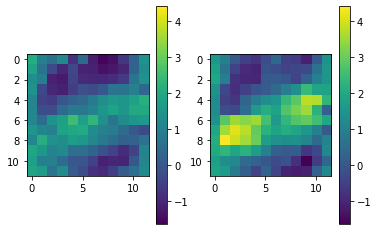

In [4]:
fig,ax = plt.subplots(1,2)
agt = agt0
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

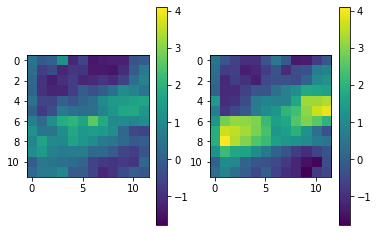

In [5]:
fig,ax = plt.subplots(1,2)
agt = agt1
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

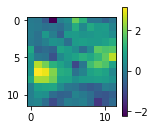

In [6]:
plt.figure(figsize=(2,2))
plt.imshow((agt.Qtab[:,1]-agt.Qtab[:,0]).reshape(12,12))
plt.colorbar();